# DIMENTIONALITY REDUCTION

* The number of input variables or features for a dataset is referred to as its dimensionality.

* Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset.

* More input features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality.

* High-dimensionality statistics and dimensionality reduction techniques are often used for data visualization. Nevertheless these techniques can be used in applied machine learning to simplify a classification or regression dataset in order to better fit a predictive model.

Lets Understand Best Dimensionality reduction techniques most used in the Industry:
1. PCA - Principal Component Analysis
2. TSNE - T-Distributed Stochastic Neighbourhood Embedding
3. UMAP 


reference of dimensionality reduction techniques: http://colah.github.io/posts/2014-10-Visualizing-MNIST/

# PCA - Principal Component Analysis

Research Paper: https://www.researchgate.net/publication/316652806_Principal_Component_Analysis

* PCA is used for dimensionality reduction that is to convert data from d dimensions to d’ dimensions where d’<d. It has applications in visualizing the data by converting it into 2-D or 3-D

# Geometric interpretation of PCA


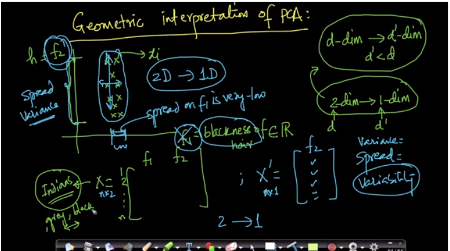

* Suppose if the data is spread as above then we can keep the y axis as its variance is more and discard x axis and reduce the dimensionality of the data.


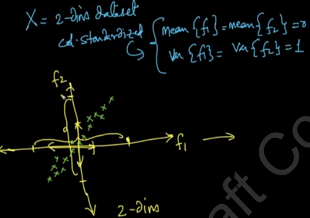

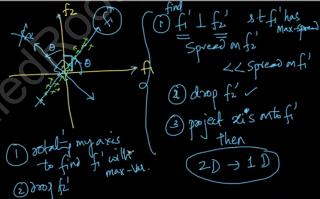

* But if the data is spread as in the above image, then we can see variance is spread equally in on both axis if we discard any one of the axis we will lose more data hence we will rotate the axis and find f11 with most variance and perpendicular to f11 is f21 with second most variance and so on and keep f11 and discard f21 to keep maximum variance.


# Mathematical objective function of PCA: Variance Maximisation

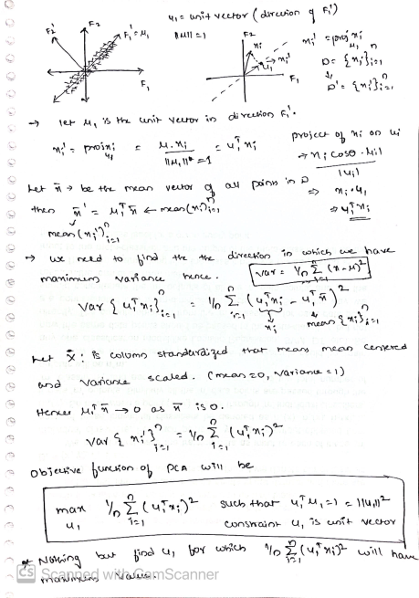


# Alternative formulation of PCA: Distance minimization

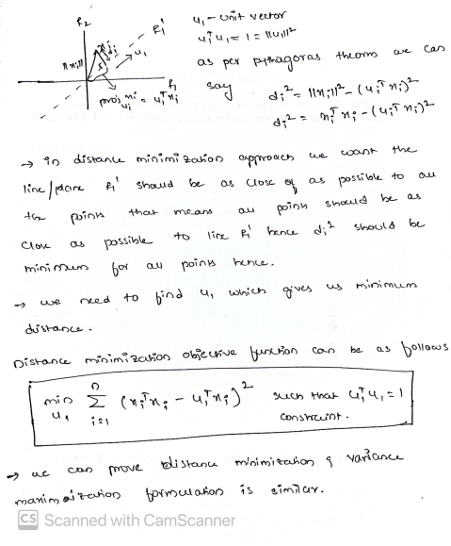


# Eigenvalues and Eigenvectors (PCA): Dimensionality reduction:

* Solutions of the above optimisation problems are finding the Eigen Values and Eigen Vectors of the co-variance matrix S of the data matrix X.

* Eigenvectors have a property that every eigen vector is perpendicular to every other eigenvector. 
* If we can find the eigenvectors and eigenvalues of the covariance matrix S, then we can easily get the direction u1 which maximizes the variance as it is equal to the eigenvector of S that corresponds to the largest eigenvalue.

## Steps for finding Prinical Components:

### Step 1: Column Standardization
* Given a matrix X, in order to find u1, the max-variance direction, we need to ensure that X is column standardized.
### Step 2: Finding Co-variance
* post this we can calculate the covariance matrix S. 
### Step 3: Finding Eigen Values and Vectors
* just find the eigenvalues and eigenvectors of S and u1 will just be the eigenvector with max eigenvalue.
### Step 4: Sort eigen values and eigen vectors
* sort of our eigenvectors of the covariance matrix S in the decreasing order of their corresponding eigenvalues, then v1 represents the direction with max-variance , v2 represents the direction with second max-variance and so on.
### Step 5: Finding variance explained
* Eigenvectors v1,v2,etc tell us the directions of most-variance, second most variance etc.
* ƛ1,ƛ2,etc tell us the variance explained in that direction. ƛ1/(ƛ1+ƛ2) tells us the percentage of variance explained by the direction of v1.





# Finding Eigen Values and Eigen Vectors of a matrix: 

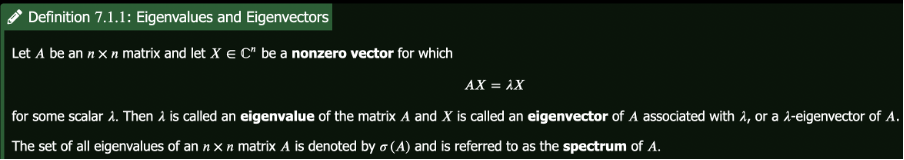

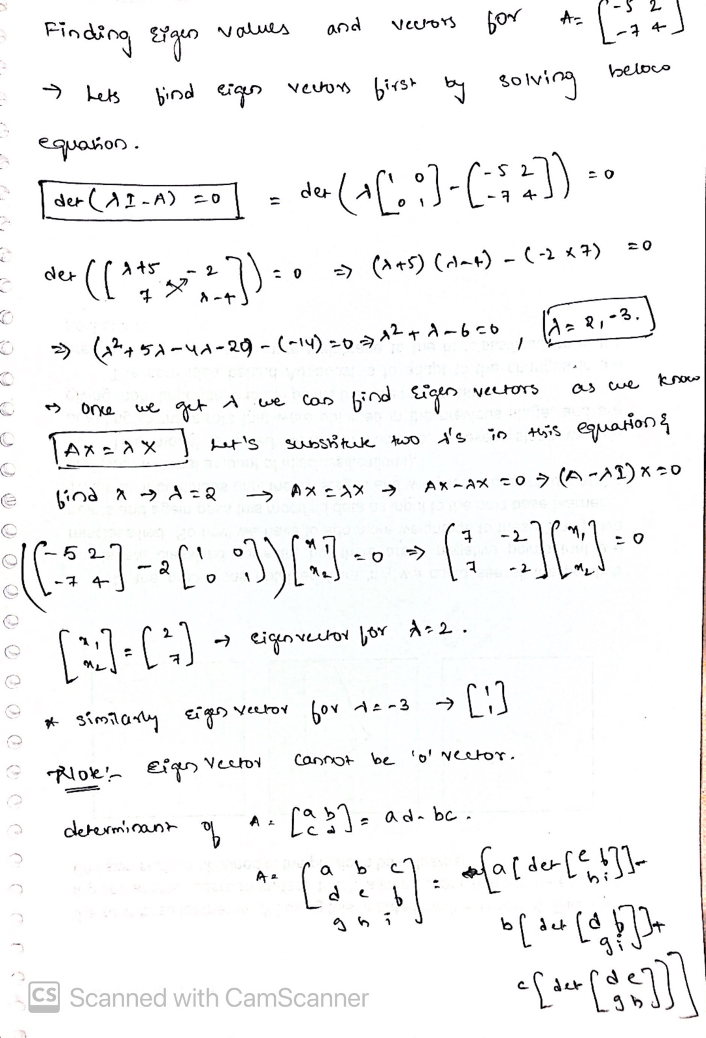

# PCA for Dimensionality Reduction and Visualization

* Suppose we have data X of 784 dimensions, for us to visualize this data, we can take the covariance matrix S and find the eigenvalues and eigenvectors of matrix S.
* Find the eigenvectors v1,v2 that have top two eigenvalues and transform this data to X’ by taking each xi and transforming into xi’ by doing xiTv1 and xiTv2. Since we can visualize 2-D, we can visualize ‘X’.


# Limitations of PCA

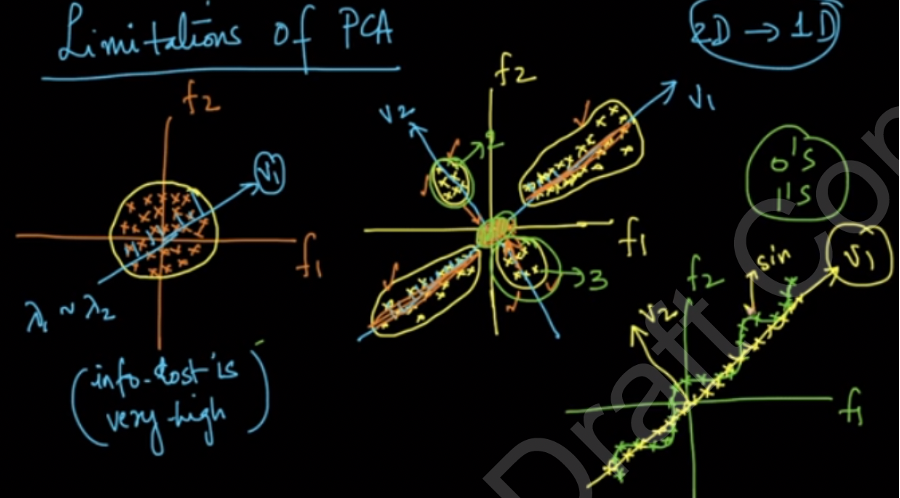

* Suppose if the original data is like a circle, then the variance is spread among all the directions, but if we reduce the data to lower dimensions, we lose most of the useful information.
* When initial the clusters of points are well separated in the original space but when the dimensionality of the data is reduced then points which are well separated might be projected together and hence difficult to separate.
* We lose shape information when PCA is applied on the data.


# Lets Understand PCA using MNIST Data 

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d oddrationale/mnist-in-csv
!unzip /content/mnist-in-csv.zip

Saving kaggle.json to kaggle.json
 46% 7.00M/15.2M [00:00<00:00, 72.0MB/s]
100% 15.2M/15.2M [00:00<00:00, 119MB/s] 
Archive:  /content/mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [34]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
   
d0 = pd.read_csv('mnist_train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [35]:
print(d.shape)
print(l.shape)

(60000, 784)
(60000,)


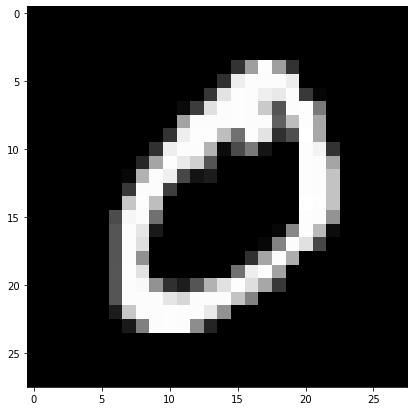

0


In [36]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

#  2D Visualization using PCA from scratch

In [37]:
# Pick first 15K data-points to work on for time-effeciency.
labels = l.head(15000)
data = d.head(15000)
print("the shape of sample data = ", data.shape)


the shape of sample data =  (15000, 784)


In [38]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(15000, 784)


In [39]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (784, 784)


In [40]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [41]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [42]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.457050       0.960769    5.0
1      -7.397795      -8.658155    0.0
2       9.640690      -2.082854    4.0
3      -3.356074       7.187465    1.0
4       2.979880       4.933889    9.0


In [43]:
import pandas as pd
df=pd.DataFrame()
df['1st']=[-5.558661,-5.043558,6.193635 ,19.305278]
df['2nd']=[-1.558661,-2.043558,2.193635 ,9.305278]
df['label']=[1,2,3,4]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



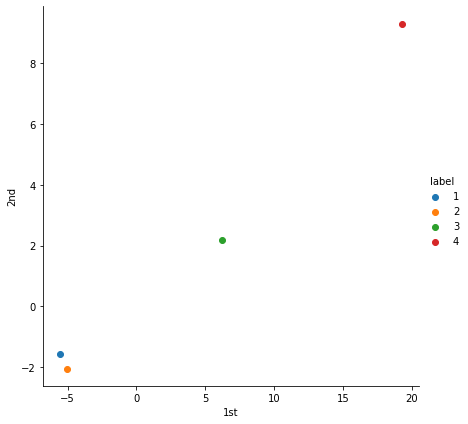

In [44]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.FacetGrid(df, hue="label", size=6).map(plt.scatter, '1st', '2nd').add_legend()
plt.show()

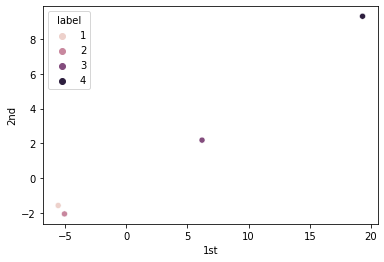

In [45]:
sn.scatterplot(x="1st",y="2nd",hue="label",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



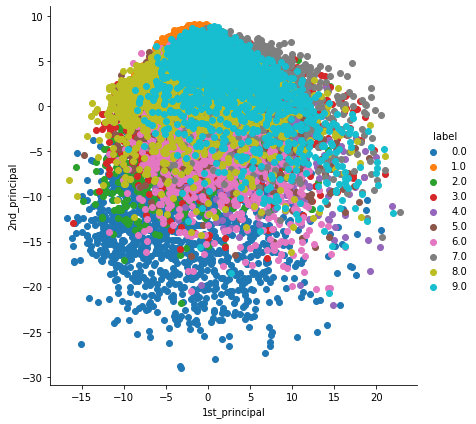

In [46]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

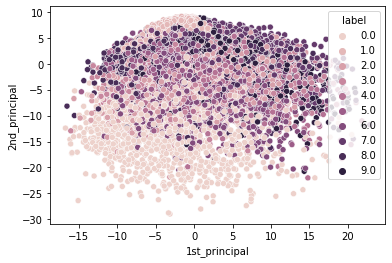

In [47]:
sn.scatterplot(x="1st_principal",y="2nd_principal",legend="full",hue="label",data=dataframe)

# PCA using Scikit-Learn

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [48]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [49]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (15000, 2)


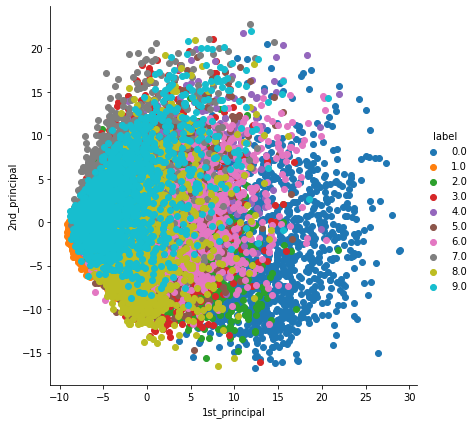

In [50]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## 3d - Visualisation of PCA

In [51]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 3
pca_data_3d = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data_3d.shape)

shape of pca_reduced.shape =  (15000, 3)


# lets write chart function to plot the techniques in 3d

In [76]:
import plotly.express as px
def chart(X, y):
    #--------------------------------------------------------------------------#
    # This section is not mandatory as its purpose is to sort the data by label 
    # so, we can maintain consistent colors for digits across multiple graphs
    y = np.array(y)
    # Concatenate X and y arrays
    arr_concat=np.concatenate((X, y.reshape(y.shape[0],1)), axis=1)
    # Create a Pandas dataframe using the above array
    df=pd.DataFrame(arr_concat, columns=['x', 'y', 'z', 'label'])
    # Convert label data type from float to integer
    df['label'] = df['label'].astype(int)
    # Finally, sort the dataframe by label
    df.sort_values(by='label', axis=0, ascending=True, inplace=True)
    #--------------------------------------------------------------------------#  
    # Create a 3D graph
    fig = px.scatter_3d(df, x='x', y='y', z='z', color=df['label'].astype(str), height=600, width=650)
    # Update chart looks
    fig.update_layout(showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=-1.4, z=0.5)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1))) 
    fig.show()

# PCA Visualisation in 3d

In [78]:
chart(pca_data_3d, labels)

# PCA for dimensionality redcution (not for visualization)

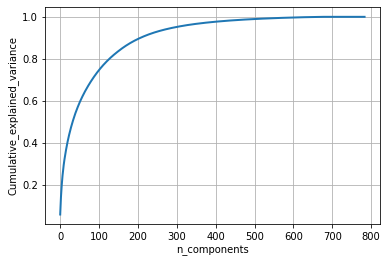

In [79]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()
# If we take 200-dimensions, approx. 90% of variance is expalined.

# T-SNE (T distributed Stochastic Neighbourhood Embedding)

Reference Research Paper: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

Best Resource to play and visualise and test T-sne:

https://distill.pub/2016/misread-tsne/
https://wedadanbtawi95.github.io/tsne/#:~:text=Learning%20rate%20(epsilon)%20really%20matter,the%20algorithm%20with%20random%20values.


* T-SNE is the state-of-the-art technique for visualization.
* One of the key disadvantages of PCA that we discussed in “limitations of PCA” is that when they are nice clusters of points that are present in the original space when they are converted to lower dimensions, these get mixed up with other points. So PCA preserves only global structure and doesn’t preserve local structure. 
* By changing parameters in t-SNE we can make it preserve local structure as well.

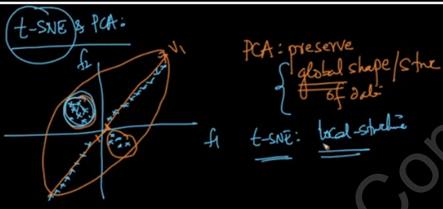


## Neighbourhood of a point and Embedding

### Neighbourhood: 
* say x1, the points around x1 are called the neighborhood of point x1. In our case the neighbourhood of x1 is the set of points x2, x3, x4,etc. The neighborhood of any point xi is the set of all points that are geometrically close to the point xi.
### Embedding:
* For any point in the high dimensional space, if we find the corresponding point in the low dimensional space, then such a thing is called embedding.

## Geometric intuition of t-SNE:

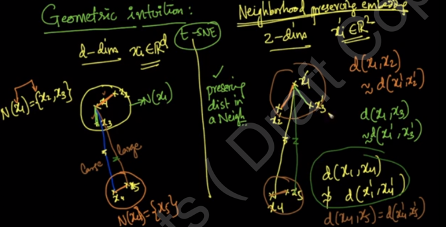

* Geometrically, what t-SNE does is, it tries to preserve the distance between the points in the same neighborhood even in the embeddings. 
* What that means is that points that the distance between points belonging to the same neighborhood is almost similar to the distance between the points in the smaller dimension as well.
* The same is not guaranteed with the points that are not in the same neighborhood in the original space.



# Mathematical understanding and optimisation function:

## Probability of two points to be neighbours:
* Lets say xij are points in d-dimensional space and yij are same points which are embedded into d| dimensional space.
* Lets calculate the probability for the two points to be neighbours as follows
 
In D-dimensional space:

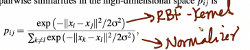

* Pij probability that points xi  and xj are neighbours.
* Here we are using RBF – kernel/gaussian kernel which we use in SVM to calculate the probability of the closeness of every points.
* Intuitively we are normalising the distance of the two points over all the point pairs available. 
* Such that we can achieve total probability for all the points is 1.

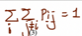




## In d| - dimensional space (let say 2-d space):

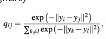


* qij probability that points yi  and yj are neighbours.
* We are considering the sigma as 1 and calculate the probability (qij) as above.
 
* <font color = 'red' > Pij and qij are distributions , and for embedding points from higher d dimensions into lower d| dimensions we want distance between the points need to be same that means there distributions need to be same.</font>

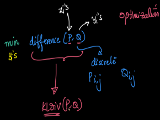



## Optimisation function of t-SNE 

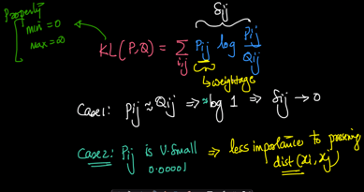

* Minimum difference between the two distributions and can be achieved by using KLDivergence of p and q needs to be minimum.
* And as per the KL divergence when pij and qij are same then kl divergence is 0 (minimum) and when pij is very small then that point has very less weightage.
* By solving above optimisation problem, we can find those point yij for which KL divergence between the two distributions is minimum.

## Why T-distributed then?

* In order to remove crowding problem researchers observed that instead of using the gaussian kernel in d| dimensional space , we can t-distributed kernel with 1 degrees of freedom which address many issues , and hence name t-SNE.

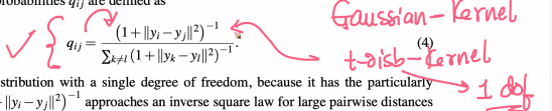


* For More details please refer to the reasearch paper provided in the start.

## Crowding Problem 

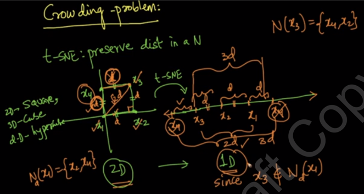


* Crowding problem is defined as follows suppose in higher dimension we have points X1,X2,X3 in same neighbourhood and when representing them in the lower dimension if we are not able to place them as per the distances we have in higher dimension ( as points in the neighbourhood are to be retained its distance between them)) then that type of problem is crowding problem.
* It is impossible to preserve the distance in the case of crowding problem and SNE used to suffer from this problem, later t-SNE was introduced to resolve this crowding problem, t-SNE doesn’t completely solves this problem but tries to minimise the errors due to this problem.


* We have two hyper parameters of t-SNE like perplexity and epsilon.

### Perplexity: 
  * The perplexity can be interpreted as a smooth measure of the effective number of neighbors. The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.

### Epsilon:
  * Epsilon is the learning rate used in the optimisation algorithm to converge.

### Points to remember while working with T-SNE:
####<font color = 'red'>Run with different Perplexity values:</font>
* Run t-SNE with different values of perplexity to get the right visualization.

* Never run t-SNE with perplexity=total_number_of_points.

#### <font color = 'red'>Always run t-SNE for more iterations until the shapes stabilize:</font>

* Always run t-SNE for multiple iterations(step), until unless you see that the shapes are stable even with further iterations.

* Always run t-SNE multiple times by fixing the perplexity and number of iterations. Since t-SNE internally is a stochastic algorithm, even with the same perplexity and number of iterations it may give slightly different results.

#### <font color = 'red'>Can’t come with the same density conclusion with t-SNE:</font>

* If two clusters have same density in the embeddings then there is no guarantee that they have the same density in the original space. t-SNE typically tends to expand dense clusters and shrink sparse clusters.

#### <font color = 'red'>t-SNE doesn’t preserve the distance between clusters:</font>
* T-SNE do not preserve distances between the clusters.



# t-SNE using Scikit-Learn

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



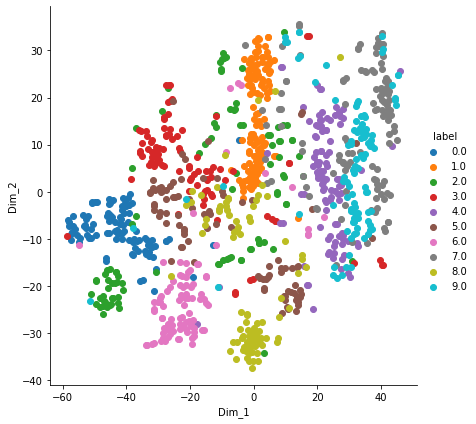

In [80]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



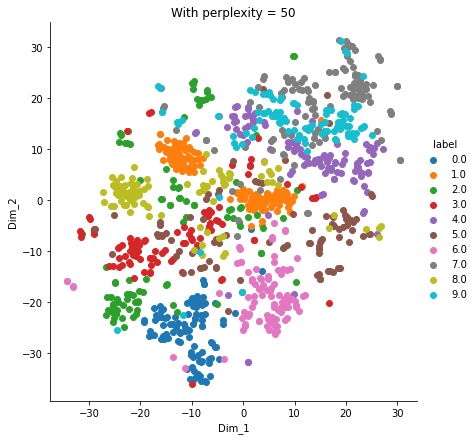

In [81]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



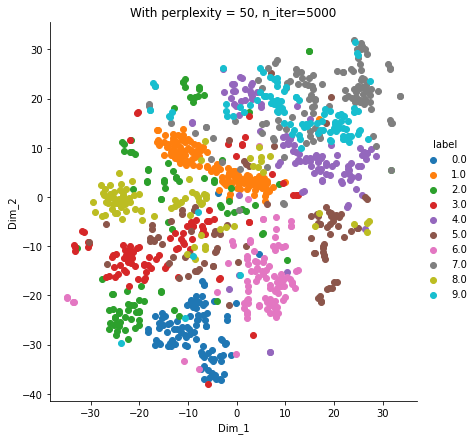

In [82]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



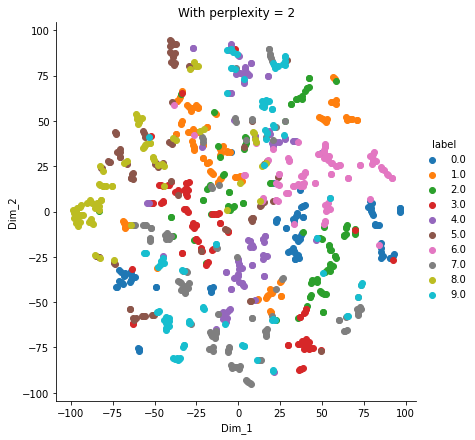

In [83]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



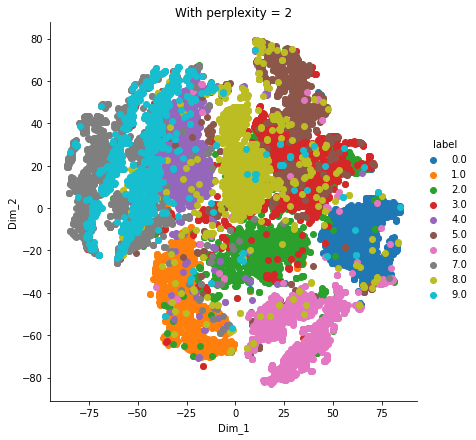

In [88]:
#Running the same analysis using 15K points with various 
#values of perplexity and iterations.
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(sample_data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

In [89]:
#Running the same analysis using 15K points with various 
#values of perplexity and iterations.
# running 15k points for 3 dimensions
model = TSNE(n_components=3, random_state=0)
%timeit
tsne_data_3d = model.fit_transform(sample_data) 


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Plotting 3d Tsne

In [90]:
chart(tsne_data_3d, labels)

# UMAP - Unifiorm Manifold Approximation and Projection

Reference: https://arxiv.org/pdf/1802.03426.pdf
UMAP play ground: https://pair-code.github.io/understanding-umap/
library: https://pypi.org/project/umap-learn/

* UMAP tries to address the (dimesnionality reduction) problem from topoloagy and graph theoratic perspective.

* UMAP address issues from t-SNE mainly the time taken by t-SNE , and not preserving the global structure.

* A dimensionality reduction technique that assumes the available data samples are evenly (uniformly) distributed across a topological space (manifold), which can be approximated from these finite data samples and mapped (projected) to a lower-dimensional space.

Lets Understand why name UMAP:


### Projection:

* the process or technique of reproducing a spatial object upon a plane, a curved surface, or a line by projecting its points. You can also think of it as a mapping of an object from high-dimensional to low-dimensional space.

### Approximation:

* the algorithm assumes that we only have a finite set of data samples (points), not the entire set that makes up the manifold. Hence, we need to approximate the manifold based on the data available.

### Manifold:

* a manifold is a topological space that locally resembles Euclidean space near each point. One-dimensional manifolds include lines and circles, but not figure eights. Two-dimensional manifolds (a.k.a. surfaces) include planes, spheres, torus, and more.

sample manifold: trefoil knot

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Trefoil_knot_arb.png/220px-Trefoil_knot_arb.png)

### Uniform:

* the uniformity assumption tells us that our data samples are uniformly (evenly) distributed across the manifold. In the real world, however, this is rarely the case. Hence, this assumption leads to the notion that the distance varies across the manifold. i.e., the space itself is warping: stretching or shrinking according to where the data appear sparser or denser.




# High Level Steps Performed by UMAP:

1.     Learning the manifold structure in the high-dimensional space;
2.     Finding a low-dimensional representation of said manifold.

<img src="https://miro.medium.com/max/720/1*oIw3ZIuHUQwPbXOtbYMp8g.png" width=300 height=300/>


### Step 1 — Learning the manifold structure

* before we can map our data to lower dimensions, we first need to figure out what it looks like in the higher-dimensional space.

#### Finding nearest neighbors

* UMAP starts by finding the nearest neighbors using  the Nearest-Neighbor-Descent algorithm of Dong et al.

* It is important to experiment with the number of n_neighbors because it controls how UMAP balances local versus global structure in the data.

* Essentially, a small value for n_neighbors means that we want a very local interpretation that accurately captures the fine detail of the structure. In contrast, a large n_neighbors value means that our estimates will be based on larger regions, thus more broadly accurate across the manifold as a whole.

#### Constructing a graph

* UMAP needs to construct a graph by connecting the previously identified nearest neighbors.

* Let’s understand how the graph is constructed.

#### Varying distance:

* we assume a uniform distribution of points across the manifold, suggesting that space between them is stretching or shrinking according to where the data appears to be sparser or denser.

* It essentially means that the distance metric is not universal across the whole space, and instead, it varies between different regions. 

<img src="https://miro.medium.com/max/720/1*NDTdukI_hbf7J-z2hShz_g.png" width=300 />

### Local connectivity:

* we want to ensure that the manifold structure we are trying to learn does not result in many unconnected points. Luckily, we can use another hyperparameter called local_connectivity (default value = 1) to solve this potential problem.

* When we set local_connectivity=1, we tell the algorithm that every point in the higher-dimensional space is connected to at least one other point.

### Fuzzy Area:

* The fuzzy circles extending beyond the closest neighbour tells us that the certainty of connection with other points decreases as we get farther away from the point of interest.

* The easiest way to think about it is by viewing the two hyperparameters (local_connectivity and n_neighbors) as lower and upper bounds:
  * local_connectivity (default=1) — there is 100% certainty that each point is connected to at least one other point (lower limit for a number of connections).
  * n_neighbors (default=15) — there is a 0% chance that a point is directly connected to a 16th+ neighbor since it falls outside the local area used by UMAP when constructing a graph.
  * neighbors 2 to 15 — there is some level of certainty (>0% but <100%) that a point is connected to its 2nd to 15th neighbor.


<img src="https://miro.medium.com/max/720/1*_KfLn5xj1dw7y3P4jdgnig.png" width=300 height=300/> 
<img src="https://miro.medium.com/max/720/1*mO-hgV2ZxR7-NTqlPYZ-uQ.png" width=300 height=300/>

### Merging of edges:

* we have employed a varying distance approach, we will unavoidably have cases where edge weights do not align when viewed from the perspective of each point. E.g., the edge weight for points A→ B will be different from the edge weight of B→ A.
* UMAP overcomes the problem of disagreeing edge weights we just described by taking a union of the two edges. Here is how UMAP documentation explains it:
If we want to merge together two disagreeing edges with weight a and b then we should have a single edge with combined weight 𝑎+𝑏−𝑎⋅𝑏. The way to think of this is that the weights are effectively the probabilities that an edge (1-simplex) exists. The combined weight is then the probability that at least one of the edges exists.
* In the end, we get a connected neighborhood graph that looks like this:

<img src="https://miro.medium.com/max/720/1*tZ-Z481ITAoWLDVoNMSOzA.png" width=300 />



## Step 2 — Finding a low-dimensional representation

* After learning the approximate manifold from the higher-dimensional space, the next step for UMAP is to project it (map it) to a lower-dimensional space.

### Minimum distance:

* Unlike the first step, we do not want varying distances in the lower-dimensional space representation. Instead, we want the distance on the manifold to be standard Euclidean distance with respect to the global coordinate system.

* The switch from varying to standard distances also impacts the proximity to nearest neighbors. Hence, we must pass another hyperparameter called min_dist (default=0.1) to define the minimum distance between embedded points.

* Essentially, we can control the minimum spread of points, avoiding scenarios with many points sitting on top of each other in the lower-dimensional embedding.

### Minimizing the cost function (Cross-Entropy):


<center> <img src="https://miro.medium.com/max/720/1*Uv7z-el3YSutoonlVal6Lw.png" width=500 /> </center>

* With the minimum distance specified, the algorithm can start looking for a good low-dimensional manifold representation. UMAP does it by minimizing the following cost function, also known as Cross-Entropy (CE).

* As you can see, the ultimate goal is to find the optimal weights of edges in the low-dimensional representation. These optimal weights emerge as the above Cross-Entropy cost function is minimized following an iterative stochastic gradient descent process.


## Hyper parameters of UMAP:

* UMAP algorithm takes four hyper-parameters: 

1.     <b><font color = 'red'> n </font></b>, the number of neighbors to consider when approximating the local metric; 
2.     <b><font color = 'red'>d</font></b>, the target embedding dimension; 
3.     <b><font color = 'red'>min-dist</font></b>, the desired separation between close points in the embedding space;
4.     <b><font color = 'red'>n-epochs</font></b>, the number of training epochs to use when optimizing the low dimensional representation.

## Points to remember: 

1.     Hyperparameters really matter
2.     Cluster sizes in a UMAP plot mean nothing
3.     Distances between clusters might not mean anything
4.     Random noise doesn’t always look random.
5.     You may need more than one plot



# Lets implement UMAP on MNIST data

In [91]:
#! pip install umap-learn # https://pypi.org/project/umap-learn/
from umap import UMAP # https://umap-learn.readthedocs.io/en/latest/parameters.html
# understanding UMAP parameters

# Configure UMAP hyperparameters
reducer = UMAP(n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=3, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=1000, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.1, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

In [92]:
# Picking the top 15000 points for UMAP
data_reduced = standardized_data[0:15000,:]
labels_reduced = labels[0:15000]

# Fit and transform the data
X_trans = reducer.fit_transform(data_reduced)

# Check the shape of the new data
print('Shape of X_trans: ', X_trans.shape)

Shape of X_trans:  (15000, 3)


In [93]:
# lets plot for 1000 points
chart(X_trans, labels_reduced)